### Лабораторная Работа номер 2:  Приближённое  решение уравнения  вида  f(x) = 0  итерационными  методами:  простой итерации, секущих и касательных (комбинированный метод). Вариант 19:   $ 2*sin(x + 0.5) = 1.5 - x $


### I. Вывод всех возможных функций из уравнения $ 2*sin(x + 0.5) = 1.5 - x $ для метода простой итерации:


### Вариант 1: $ x = 1.5 - 2 \sin(x + 0.5) $


### Вариант 2: $ x = \arcsin\left(\frac{1.5 - x}{2}\right) - 0.5 $
1. Начнем с исходного уравнения:
   $  2 \sin(x + 0.5) = 1.5 - x  $
2. Разделим обе части уравнения на 2:
   $ sin(x + 0.5) = \frac{1.5 - x}{2} $
3. Возьмем арксинус от обеих частей уравнения:
   $ x + 0.5 = \arcsin\left(\frac{1.5 - x}{2}\right) $
4. Вычтем 0.5 из обеих частей уравнения:
   $ x = \arcsin\left(\frac{1.5 - x}{2}\right) - 0.5 $


### Вариант 3: $ x = \frac{1.5 - 2 \sin(x + 0.5)}{2} $
1. Начнем с исходного уравнения:
   $ 2 \sin(x + 0.5) = 1.5 - x $
2. Выразим \(x\) из правой части уравнения:
   $ x = 1.5 - 2 \sin(x + 0.5) $
3. Разделим обе части уравнения на 2:
   $ x = \frac{1.5 - 2 \sin(x + 0.5)}{2} $


Метод Вариант 1: x = 1.5 - 2sin(x + 0.5):
	Не сходится.


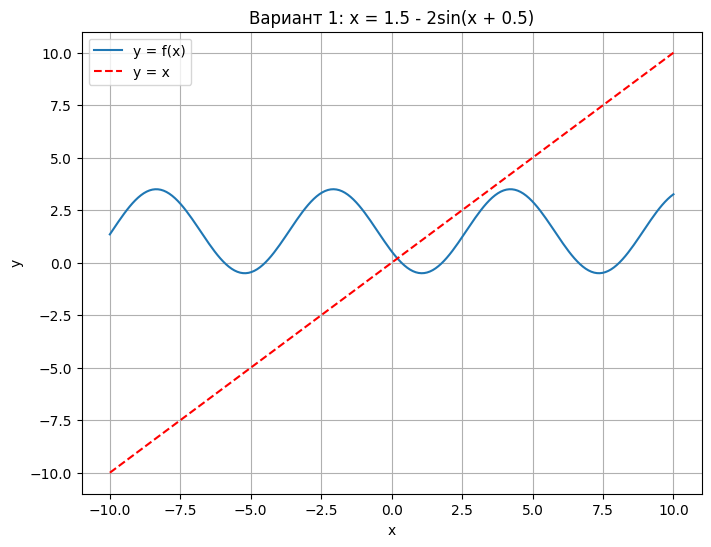

P:\pmr231\AppData\Local\temp\202\ipykernel_337668\1670925221.py:9: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin((1.5 - x) / 2) - 0.5


Метод Вариант 2: x = arcsin((1.5 - x)/2) - 0.5:
	Сходится после 32 итераций.
	Приближенное решение: x ≈ 0.2045766487799512


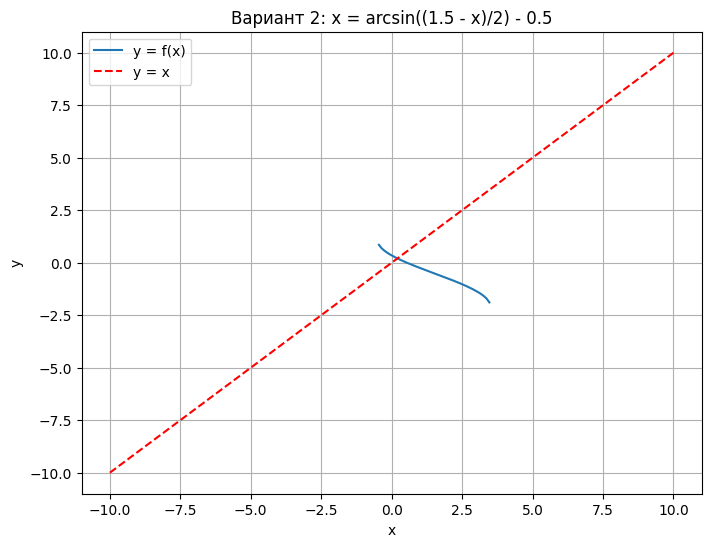

Метод Вариант 3: x = (1.5 - 2sin(x + 0.5))/2:
	Не сходится.


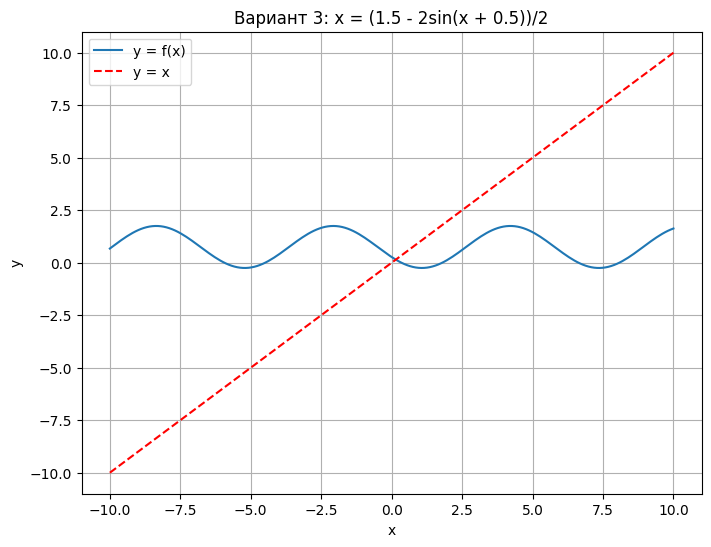

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def variant_1(x):
    return 1.5 - 2 * np.sin(x + 0.5)

def variant_2(x):
    return np.arcsin((1.5 - x) / 2) - 0.5

def variant_3(x):
    return (1.5 - 2 * np.sin(x + 0.5)) / 2

def plot_and_analyze(func, title, max_iter=100, tolerance=1e-6):
    # Построение графика функции
    x_values = np.linspace(-10, 10, 200)
    y_values = func(x_values)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x_values, y_values, label='y = f(x)')
    ax.plot(x_values, x_values, 'r--', label='y = x')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)
    ax.set_title(title)
    
    # Анализ сходимости
    initial_guess = 0.5  # Начальное приближение
    iter_count = 0
    x_prev = initial_guess
    while True:
        x_next = func(x_prev)
        if abs(x_next - x_prev) < tolerance or iter_count >= max_iter:
            break
        x_prev = x_next
        iter_count += 1
        
    print(f'Метод {title}:')
    if iter_count < max_iter:
        print(f'\tСходится после {iter_count} итераций.')
        print(f'\tПриближенное решение: x ≈ {x_next}')
    else:
        print('\tНе сходится.')

    plt.show()

if __name__ == "__main__":
    plot_and_analyze(variant_1, 'Вариант 1: x = 1.5 - 2sin(x + 0.5)', max_iter=50)
    plot_and_analyze(variant_2, 'Вариант 2: x = arcsin((1.5 - x)/2) - 0.5', max_iter=50)
    plot_and_analyze(variant_3, 'Вариант 3: x = (1.5 - 2sin(x + 0.5))/2', max_iter=50)

Вариант 1: Угловой коэффициент больше 1. Метод расходится.
Вариант 2: Угловой коэффициент меньше 1. Метод сходится.
Вариант 3: Угловой коэффициент меньше 1. Метод сходится.


P:\pmr231\AppData\Local\temp\202\ipykernel_337668\895235215.py:12: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin((1.5 - x) / 2) - 0.5


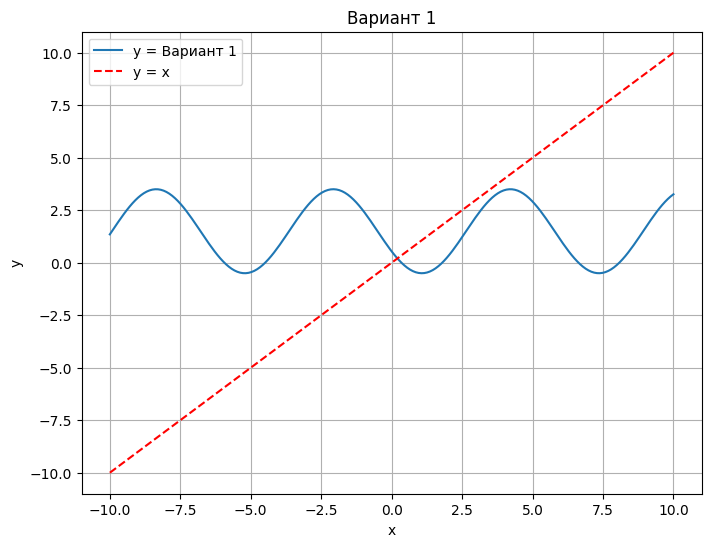

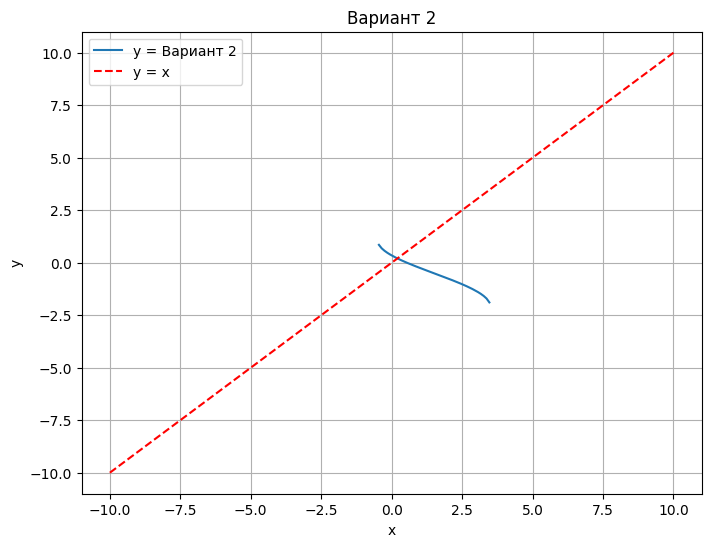

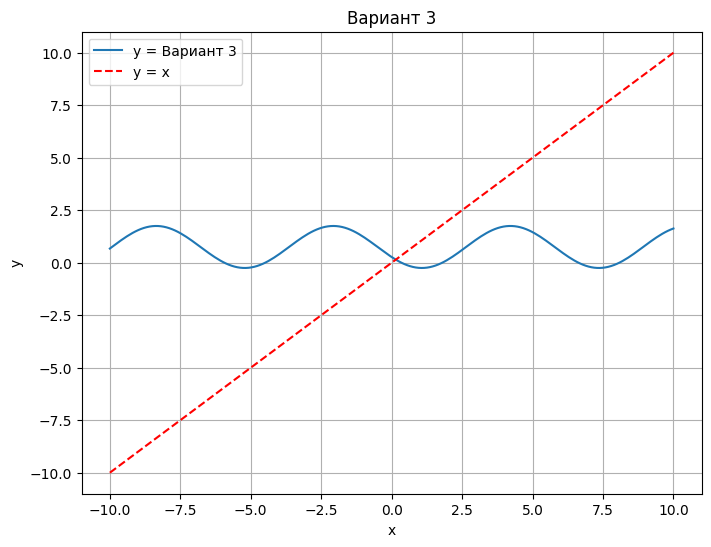

Iteration 0: Корень = -0.091471, |X(n)-X(n-1)| = 0.591471
Iteration 1: Корень = 0.35274, |X(n)-X(n-1)| = 0.444211
Iteration 2: Корень = -0.00308605, |X(n)-X(n-1)| = 0.355826
Iteration 3: Корень = 0.273285, |X(n)-X(n-1)| = 0.276371
Iteration 4: Корень = 0.0515102, |X(n)-X(n-1)| = 0.221775
Iteration 5: Корень = 0.226026, |X(n)-X(n-1)| = 0.174516
Iteration 6: Корень = 0.086097, |X(n)-X(n-1)| = 0.139929
Iteration 7: Корень = 0.196886, |X(n)-X(n-1)| = 0.110789
Iteration 8: Корень = 0.108167, |X(n)-X(n-1)| = 0.0887195
Iteration 9: Корень = 0.178636, |X(n)-X(n-1)| = 0.0704691
Iteration 10: Корень = 0.122268, |X(n)-X(n-1)| = 0.0563679
Iteration 11: Корень = 0.16712, |X(n)-X(n-1)| = 0.0448522
Iteration 12: Корень = 0.131274, |X(n)-X(n-1)| = 0.0358466
Iteration 13: Корень = 0.159827, |X(n)-X(n-1)| = 0.0285528
Iteration 14: Корень = 0.13702, |X(n)-X(n-1)| = 0.0228063
Iteration 15: Корень = 0.155197, |X(n)-X(n-1)| = 0.0181771
Iteration 16: Корень = 0.140684, |X(n)-X(n-1)| = 0.014513
Iteration 17: 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import fabs

def variant_1(x):
    """Вариант 1: x = 1.5 - 2*sin(x + 0.5)"""
    return 1.5 - 2 * np.sin(x + 0.5)

def variant_2(x):
    """Вариант 2: x = arcsin((1.5 - x)/2) - 0.5"""
    return np.arcsin((1.5 - x) / 2) - 0.5

def variant_3(x):
    """Вариант 3: x = (1.5 - 2*sin(x + 0.5))/2"""
    return (1.5 - 2 * np.sin(x + 0.5)) / 2

def derivative_of_function(func, x):
    """Вычисляет приближенную производную функции в точке x."""
    h = 1e-7  # Малое смещение для численной производной
    return (func(x + h) - func(x - h)) / (2 * h)

def show_graphs_and_analyze():
    """
    Показывает графики функций и анализирует сходимость на основе углового коэффициента.
    """
    for i, func in enumerate([variant_1, variant_2, variant_3]):
        title = f"Вариант {i+1}"
        x_values = np.linspace(-10, 10, 200)
        y_values = func(x_values)
        
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.plot(x_values, y_values, label=f'y = {title}')
        ax.plot(x_values, x_values, 'r--', label='y = x')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend()
        ax.grid(True)
        ax.set_title(title)
        
        # Проверка сходимости на основе углового коэффициента
        root = fsolve(lambda x: func(x) - x, 0)[0]
        slope_at_root = derivative_of_function(func, root)
        if fabs(slope_at_root) < 1:
            print(f"{title}: Угловой коэффициент меньше 1. Метод сходится.")
        else:
            print(f"{title}: Угловой коэффициент больше 1. Метод расходится.")

    plt.show()

def calculate_iteration(func, x_initial, tolerance):
    """
    Выполняет метод простых итераций и возвращает результат.
    :param func: Функция для анализа
    :param x_initial: Начальная точка
    :param tolerance: Требуемая точность
    :return: Конечное приближение корня
    """
    x_prev = x_initial
    iter_count = 0
    while True:
        x_next = func(x_prev)
        error = fabs(x_next - x_prev)
        print(f"Iteration {iter_count}: Корень = {x_next:.6g}, |X(n)-X(n-1)| = {error:.6g}")
        if error < tolerance:
            print("Method converges!")
            return x_next
        elif iter_count > 20 and error > 1e-3:  # Проверка на расхождение
            print("Method diverges!")
            return None
        x_prev = x_next
        iter_count += 1

def main():
    # Этап 1: Показываем графики и проводим предварительный анализ
    show_graphs_and_analyze()

    # Этап 2: Запрашиваем ввод данных от пользователя
    func_choice = int(input("Выберите вариант функции (1, 2 или 3): "))
    func_map = {
        1: variant_1,
        2: variant_2,
        3: variant_3
    }
    selected_func = func_map.get(func_choice, None)
    if selected_func is None:
        print("Неправильный выбор функции.")
        return

    start_range = float(input("Введите начало диапазона: "))
    end_range = float(input("Введите конец диапазона: "))
    x_initial = float(input("Введите начальное приближение: "))
    precision = float(input("Введите требуемую точность: "))
    tolerance = 10 ** -(len(str(precision)) - 2)  # Определяем точность исходя из длины строки точности

    # Выполнение метода простых итераций
    result = calculate_iteration(selected_func, x_initial, tolerance)
    if result is not None:
        print(f"Конечное приближение корня: {result:.6g}")
    else:
        print("Конечное приближение не найдено.")

if __name__ == "__main__":
    main()

# OLD CODE непомню даже что там

<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
P:\pmr231\AppData\Local\temp\202\ipykernel_345520\3801827942.py:27: SyntaxWarning: invalid escape sequence '\d'
  plt.title('График функции $f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$')


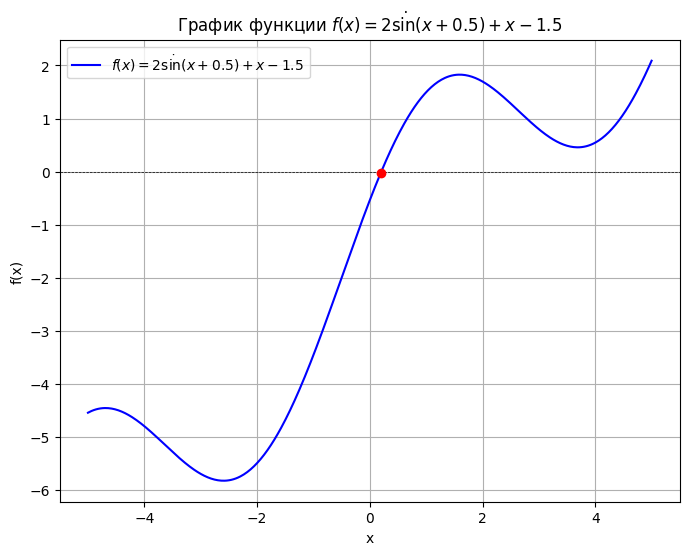

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Создаем массив значений x
x = np.linspace(-5, 5, 500)

# Вычисляем значения функции
y = f(x)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$', color='blue')

# Добавляем горизонтальную линию y=0 для наглядности
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')

# Находим приближенные точки пересечения с осью x
zero_crossings = np.where(np.diff(np.sign(y)))[0]
for crossing in zero_crossings:
    plt.plot(x[crossing], y[crossing], 'ro')  # Отмечаем точки пересечения красными точками

# Добавляем легенду, сетку и заголовок
plt.title('График функции $f(x) = 2 \dot \sin(x + 0.5) + x - 1.5$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

In [4]:
import numpy as np

# Определяем функцию g(x) для метода простой итерации
def g(x):
    return 1.5 - 2 * np.sin(x + 0.5)

# Определяем производную функции g(x)
def g_derivative(x):
    return -2 * np.cos(x + 0.5)

# Проверка условия сходимости
def check_convergence(a, b):
    """
    Проверяет условие сходимости метода простой итерации: |g'(x)| < 1.

    :param a: Начало интервала
    :param b: Конец интервала
    :return: True, если условие сходимости выполнено, иначе False
    """
    # Создаем массив значений x в интервале [a, b]
    x_values = np.linspace(a, b, 500)
    # Вычисляем значения производной |g'(x)| для всех x в интервале
    derivative_values = np.abs(g_derivative(x_values))
    max_derivative = np.max(derivative_values)  # Находим максимальное значение |g'(x)|

    if max_derivative >= 1:
        print("Проверка на условие сходимости не пройдена.")
        print(f"Максимальное значение |g'(x)| в интервале [{a}, {b}] равно {max_derivative:.4f}.")
        print("Условие сходимости метода простой итерации требует, чтобы |g'(x)| < 1.")
        print("Поскольку |g'(x)| >= 1, метод может расходиться.")
        print("Рекомендуется использовать другой метод, например, метод из первой лабораторной работы.")
        return False
    else:
        print("Проверка на условие сходимости пройдена.")
        return True

# Метод простой итерации
def simple_iteration(a, b, tol, max_iter=1000):
    """
    Находит корень уравнения методом простой итерации.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :param max_iter: Максимальное количество итераций
    :return: Приближенное значение корня
    """
    # Проверка условия сходимости
    if not check_convergence(a, b):
        return None

    # Выбираем начальное приближение как середину интервала
    x_prev = (a + b) / 2

    # Определяем количество знаков после запятой для форматирования
    precision_digits = abs(int(np.floor(np.log10(tol))))

    print(f"{'Итерация':<10}{'x_prev':<15}{'x_next':<15}{'|x_next - x_prev|':<20}")
    print("-" * 65)

    iteration = 0
    while iteration < max_iter:
        x_next = g(x_prev)  # Вычисляем следующее приближение
        diff = abs(x_next - x_prev)  # Разница между текущим и предыдущим значением

        # Выводим отчет по текущей итерации
        print(f"{iteration:<10}{x_prev:<15.{precision_digits}f}{x_next:<15.{precision_digits}f}{diff:<20.{precision_digits}f}")

        if diff < tol:  # Проверяем условие выхода
            print(f"\nКорень найден: {x_next:.{precision_digits}f}")
            return x_next

        x_prev = x_next  # Обновляем предыдущее значение
        iteration += 1

    print("\nМетод не сошелся за максимальное количество итераций.")
    return None

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = simple_iteration(a, b, tol)
except ValueError as e:
    print(f"Ошибка: {e}")

Ошибка: could not convert string to float: ''


In [5]:
import numpy as np

# Определяем новую функцию g(x) для метода простой итерации
def g(x):
    return np.arcsin((1.5 - x) / 2) - 0.5

# Определяем производную функции g(x)
def g_derivative(x):
    return 1 / (2 * np.sqrt(1 - ((1.5 - x) / 2)**2))

# Проверка условия сходимости
def check_convergence(a, b):
    """
    Проверяет условие сходимости метода простой итерации: |g'(x)| < 1.

    :param a: Начало интервала
    :param b: Конец интервала
    :return: True, если условие сходимости выполнено, иначе False
    """
    # Создаем массив значений x в интервале [a, b]
    x_values = np.linspace(a, b, 500)
    # Вычисляем значения производной |g'(x)| для всех x в интервале
    derivative_values = np.abs(g_derivative(x_values))
    max_derivative = np.max(derivative_values)  # Находим максимальное значение |g'(x)|

    if max_derivative >= 1:
        print("Проверка на условие сходимости не пройдена.")
        print(f"Максимальное значение |g'(x)| в интервале [{a}, {b}] равно {max_derivative:.4f}.")
        print("Условие сходимости метода простой итерации требует, чтобы |g'(x)| < 1.")
        print("Поскольку |g'(x)| >= 1, метод может расходиться.")
        print("Рекомендуется использовать другой метод, например, метод половинного деления или метод Ньютона.")
        return False
    else:
        print("Проверка на условие сходимости пройдена.")
        return True

# Метод простой итерации
def simple_iteration(a, b, tol, max_iter=1000):
    """
    Находит корень уравнения методом простой итерации.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :param max_iter: Максимальное количество итераций
    :return: Приближенное значение корня
    """
    # Проверка условия сходимости
    if not check_convergence(a, b):
        return None

    # Выбираем начальное приближение как середину интервала
    x_prev = (a + b) / 2

    # Определяем количество знаков после запятой для форматирования
    precision_digits = abs(int(np.floor(np.log10(tol))))

    print(f"{'Итерация':<10}{'x_prev':<15}{'x_next':<15}{'|x_next - x_prev|':<20}")
    print("-" * 65)

    iteration = 0
    while iteration < max_iter:
        x_next = g(x_prev)  # Вычисляем следующее приближение
        diff = abs(x_next - x_prev)  # Разница между текущим и предыдущим значением

        # Выводим отчет по текущей итерации
        print(f"{iteration:<10}{x_prev:<15.{precision_digits}f}{x_next:<15.{precision_digits}f}{diff:<20.{precision_digits}f}")

        if diff < tol:  # Проверяем условие выхода
            print(f"\nКорень найден: {x_next:.{precision_digits}f}")
            return x_next

        x_prev = x_next  # Обновляем предыдущее значение
        iteration += 1

    print("\nМетод не сошелся за максимальное количество итераций.")
    return None

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = simple_iteration(a, b, tol)
except ValueError as e:
    print(f"Ошибка: {e}")

Ошибка: could not convert string to float: ''


## Метод хорд и касательных (комбинированный)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию f(x)
def f(x):
    return 2 * np.sin(x + 0.5) + x - 1.5

# Определяем производную функции f'(x)
def df(x):
    return 2 * np.cos(x + 0.5) + 1

# Функция для построения графика на каждой итерации
def plot_iteration(a, b, a_new, b_new, iteration):
    """
    Строит график функции f(x) с текущими границами интервала,
    секущей (метод хорд) и касательной (метод Ньютона).

    :param a: Текущая левая граница
    :param b: Текущая правая граница
    :param a_new: Новая левая граница (метод хорд)
    :param b_new: Новая правая граница (метод Ньютона)
    :param iteration: Номер итерации
    """
    x = np.linspace(a - 1, b + 1, 500)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=r"$f(x) = 2 \cdot \sin(x + 0.5) + x - 1.5$", color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--", label="y = 0")

    # Отображаем текущие границы интервала
    plt.scatter([a, b], [f(a), f(b)], color="red", label="Границы интервала")
    
    # Отображаем секущую (метод хорд)
    plt.plot([a, b], [f(a), f(b)], color="green", linestyle="--", label="Секущая (хорда)")
    
    # Отображаем касательную (метод Ньютона)
    tangent_x = np.linspace(b - 1, b + 1, 100)
    tangent_y = f(b) + df(b) * (tangent_x - b)
    plt.plot(tangent_x, tangent_y, color="orange", linestyle="--", label="Касательная (Ньютон)")

    # Отображаем новые границы интервала
    plt.scatter([a_new, b_new], [f(a_new), f(b_new)], color="purple", label="Новые границы")

    plt.title(f"Итерация {iteration}: График функции с секущей и касательной")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Комбинированный метод хорд и касательных
def combined_method(a, b, tol):
    """
    Комбинированный метод хорд и касательных.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :return: Приближенное значение корня
    """
    # Проверка изменения знака
    if f(a) * f(b) >= 0:
        raise ValueError("Функция должна менять знак на интервале [a, b].")

    # Проверка производной
    if df(a) == 0 or df(b) == 0:
        raise ValueError("Производная равна нулю на границах интервала.")

    print("Начинаем комбинированный метод хорд и касательных:")
    iteration = 0
    while abs(b - a) > tol:
        # Метод хорд (обновление левой границы)
        a_new = a - f(a) * (b - a) / (f(b) - f(a))
        
        # Метод касательных (обновление правой границы)
        b_new = b - f(b) / df(b)
        
        # Вывод отчета по текущей итерации
        print(f"Итерация {iteration}: a = {a_new:.6f}, b = {b_new:.6f}, |b - a| = {abs(b_new - a_new):.6f}")
        
        # Строим график для текущей итерации
        plot_iteration(a, b, a_new, b_new, iteration)
        
        # Обновляем границы интервала
        a, b = a_new, b_new
        iteration += 1

    # Возвращаем среднее значение между границами как корень
    root = (a + b) / 2
    return root

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = combined_method(a, b, tol)
    print(f"\nКорень уравнения: {root:.6f}")
except ValueError as e:
    print(f"Ошибка: {e}")

Ошибка: could not convert string to float: ''
